<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/A3b_DL_TC5033_AD2023_text_classifier_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


### Import libraries

In [103]:
# conda install -c pytorch torchtext
# conda install -c pytorch torchdata
# conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

In [104]:
pip install portalocker

In [105]:
pip install scikit-plot

In [106]:
!pip install torchtext

In [107]:

!pip install torchdata


In [108]:
pip install torch==1.9.1+cu102 torchvision==0.10.1+cu102 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.9.1+cu102 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.

In [109]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
import torchtext

from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import gc

In [110]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

<h3>Prepare the AG_NEWS dataset, converting it into a map-style PyTorch dataset format for both the training (train_dataset) and testing (test_dataset) datasets.</h3>
<p>AG_NEWS dataset consists of news articles collected from the AG's news corpus and is categorized into four classes: World, Sports, Business, and Sci/Tech. Each article is a short piece of text, and the dataset is often used for tasks like text classification, topic modeling, and sentiment analysis</p>

In [111]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

<p>Create a tokenizer using the 'basic_english' tokenizer provided by a library torchtext.data.utils</p>
<p>yield_tokens is a function that iterates over the dataset, extracting each text sample, and tokenizes it using the tokeniser </p>

In [112]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

<p>Construct a vocabulary (vocab) from the tokens generated by the yield_tokens</p>
<p>If we try to access a token that is not present in the vocabulary, it will return the index of 'unk'</p>

In [113]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [114]:
#test tokens
tokens = tokeniser('Welcome to TE3007')
print(tokens, vocab(tokens))

['welcome', 'to', 'te3007'] [3314, 4, 0]


<p>Define the validation size and the training size</p>

In [115]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [116]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [117]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


<h3>Process a batch of data before it's used for training or evaluation</h3>
<p>The function takes a batch of data, tokenizes the text, ensures uniform sequence length, and prepares the labels for use in a model, returning them as PyTorch tensors</p>

In [118]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [119]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

<h3>Create data loaders for your training, validation, and test datasets</h3>

In [120]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

<p>Define the arguments we will be using in our model</p>

In [121]:
EMBEDDING_SIZE = 200 # complete
NEURONS = 256 # complete
LAYERS = 3 # complete
NUM_CLASSES = len(labels) # complete

<h3> Create a simple recurrent neural network (RNN) model for text classification.
</h3>
<p>
      Args:
          embed_size (int): The size of the word embeddings.
          hidden (int): The number of units in the hidden RNN layer.
          layers (int): The number of RNN layers.
          num_classes (int): The number of output classes for classification.</p>
<p>
      Attributes:
          embedding_layer (nn.Embedding): Converts words into fixed-size vectors.
          rnn (nn.RNN): The recurrent neural network layer.
          fc (nn.Linear): Linear layer for classification.
          </p>

In [122]:
class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        # Provide embedding vectors for elements of a discrete set, like a vocabulary
        # Convert words into fixed-size vectors in a high-dimensional space
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        # Define the RNN model with the arguments provided
        self.rnn = nn.RNN(input_size=embed_size,hidden_size=hidden,num_layers = layers,batch_first=True) # complete this code/
                        # You may use PyTorch nn.GRU(), nn.RNN(), or nn.LSTM()

        # Linear layer for classification
        # Fully connected layer that applies a linear transformation to its input
        self.fc = nn.Linear(hidden, num_classes) # complete output classifier layer using linear layer

    def forward(self, x):
        # implement forward pass. This function will be called when executing the model
        out = self.embedding_layer(x)  # Pass input through embedding layer
        out, _ = self.rnn(out)  # Pass embeddings through RNN; we discard the hidden state returned by the RNN
        out = out[:, -1, :]  # We're interested in the output of the RNN for the last time step
        out = self.fc(out)  # Pass the RNN output through the linear layer
        return out


<h3>Compute Model Accuracy and Collect Predictions</h3>
<p>This function is designed to evaluate the accuracy of our model, assuming the use of GPU. It operates on a dataset and returns not only the accuracy score but also collects the true labels and model predictions. These true labels and predictions are important for later analysis, such as building a confusion matrix to assess the model's performance.</p>

In [123]:
def accuracy(model, loader):
    model.eval()  # Set the model to evaluation mode
    model = model.to(device=device)
    correct = 0
    total = 0
    all_true = []  # Initialize a list to store true labels
    all_predicted = []  # Initialize a list to store predicted labels

    with torch.no_grad():  # No need to compute gradients for this
        for data in loader:
            inputs, labels = data  # Data loader returns a tuple of inputs and labels

            inputs = inputs.to(device=device, dtype=torch.long)
            labels = labels.to(device=device, dtype=torch.long)

            outputs = model(inputs)  # Get model predictions

            _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
            total += labels.size(0)  # Increment the total count
            correct += (predicted == labels).sum().item()  # Increment the correct count

            # Append true and predicted labels to the respective lists
            all_true.extend(labels.cpu().numpy())
            all_predicted.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total  # Compute accuracy as a percentage
    return accuracy, all_true, all_predicted  # Return accuracy and the lists

<h3>Training Function with PyTorch</h3>
<p>This function serves as a standard training approach for PyTorch-based models. Firstly, it ensures that both the model and the data are available on the specified device, facilitating GPU acceleration if available. Secondly, it calculates both the loss with Cross-Entropy and accuracy at regular intervals, specifically after processing every 200 mini-batches.</p>

In [124]:
def train(model, optimizer, loader, epochs=100):

    # Set the model to training mode
    model.train()
    model = model.to(device=device)

    # Define the loss function
    criterion = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(epochs):
        running_loss = 0.0
        total=0
        correct = 0
        for i, data in enumerate(loader, 0):
            # Separate inputs and labels
            inputs, labels = data

            # Clear old gradients
            optimizer.zero_grad()

            # Convert labels to torch.long data type
            inputs = inputs.to(device = device,dtype=torch.long)
            labels = labels.to(device = device,dtype=torch.long)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update accuracy calculations
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Print statistics (optional)
            running_loss += loss.item()
            if i % 200 == 199:  # Print every 200 mini-batches
                accuracy = 100 * correct / total  # <-- Calculate accuracy
                print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 200:.3f}, accuracy: {accuracy:.2f}%")

                running_loss = 0.0

    print("Finished Training")

In [125]:
epochs = 35# Specify epochs
lr = 0.0001# learning rate
rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES) # Declare the model
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=lr) # Declare the type of optimizer

<h3>Apply training to our RNN model</h3>

In [126]:
train(rnn_model, optimizer=optimizer,loader=train_loader,epochs=epochs)

[1, 200] loss: 1.383, accuracy: 27.46%
[1, 400] loss: 1.227, accuracy: 34.95%
[2, 200] loss: 0.947, accuracy: 60.07%
[2, 400] loss: 0.819, accuracy: 64.00%
[3, 200] loss: 0.711, accuracy: 73.43%
[3, 400] loss: 0.640, accuracy: 75.04%
[4, 200] loss: 0.575, accuracy: 79.40%
[4, 400] loss: 0.544, accuracy: 79.98%
[5, 200] loss: 0.502, accuracy: 82.34%
[5, 400] loss: 0.491, accuracy: 82.54%
[6, 200] loss: 0.452, accuracy: 84.17%
[6, 400] loss: 0.431, accuracy: 84.51%
[7, 200] loss: 0.410, accuracy: 85.84%
[7, 400] loss: 0.399, accuracy: 86.06%
[8, 200] loss: 0.364, accuracy: 87.61%
[8, 400] loss: 0.374, accuracy: 87.41%
[9, 200] loss: 0.352, accuracy: 88.01%
[9, 400] loss: 0.343, accuracy: 88.17%
[10, 200] loss: 0.328, accuracy: 88.93%
[10, 400] loss: 0.327, accuracy: 88.88%
[11, 200] loss: 0.302, accuracy: 89.84%
[11, 400] loss: 0.302, accuracy: 89.85%
[12, 200] loss: 0.292, accuracy: 90.14%
[12, 400] loss: 0.287, accuracy: 90.29%
[13, 200] loss: 0.271, accuracy: 90.99%
[13, 400] loss: 0.

<h3>Evaluating Model Performance</h3>
<p>Assessing the performance of our trained model reveals valuable insights. While our model achieved 95% accuracy on the training set, it's essential to note that real-world performance may differ. On the test set, the accuracy slightly drops to 89%. This reduction is expected as the model faces unseen data, but it still demonstrates robustness. Considering that some articles may fit various categories. To gain a deeper understanding of its performance and identify potential areas of improvement, we'll further analyze its predictions using a confusion matrix, which will provide a more comprehensive view of how the model handles different classes and potential areas for optimization.</p>

<h3>

In [127]:
print(f'{accuracy(rnn_model, test_loader)[0]:.4f}')

88.5395


<p>This function serves as a text classification model, capable of assigning one of four predefined labels to input text.</p>
<p>Before making a prediction, the input text undergoes a preprocessing step where it is tokenized using the tokeniser function. Tokenization breaks the text into individual units, typically words or subword tokens, making it suitable for analysis by the model.</p>
<p>After preprocessing, the model leverages its learned patterns and knowledge to classify the text into one of the available categories.</p>

In [128]:
def classify_text(model, text):

    # Preprocess the text
    processed_text = tokeniser(text)
    processed_text = [int(token) for token in processed_text]

    # Convert the processed text to a tensor
    # (Assuming the text is now a list of integers)
    text_tensor = torch.tensor(processed_text, dtype=torch.long).unsqueeze(0)  # Add batch dimension

    # If your model is on GPU, move the tensor to GPU
    if next(model.parameters()).is_cuda:
        text_tensor = text_tensor.cuda()

    # Set the model to evaluation mode
    model.eval()

    # Pass the tensor through the model
    with torch.no_grad():
        outputs = model(text_tensor)

    # Get the predicted class
    _, predicted_class = torch.max(outputs.data, 1)

    print(predicted_class)

    # Convert the predicted class to a Python integer and return it
    return predicted_class.item()

<p>This function samples and classifies elements within a data loader using the previously defined `classify_text` function.</p>
<p>It accomplishes this by first randomly selecting a batch from the given data loader and then further randomizing the selection by picking an instance from that batch.</p>
<p>The selected instance is then transformed into a format suitable for input to the `classify_text` function, which provides a label prediction for the text.</p>
<p>Additionally, the function retrieves the original text from the tokenized instance, facilitating interpretability and enabling further analysis of the model's predictions.</p>
<p>Ultimately, the function returns both the original text and the predicted label, offering insights into how the model classifies random samples from the dataset.</p>

In [129]:
import random

def sample_text(model,load):
    # Randomly select a batch from the loader
    batch_idx = random.randint(0, len(load) - 1)
    for i, batch in enumerate(load):
        if i == batch_idx:
            inputs, _ = batch  # Each batch is a tuple of (inputs, labels)
            break

    # Randomly select an instance from the batch
    instance_idx = random.randint(0, len(inputs) - 1)
    instance = inputs[instance_idx]


    # Convert instance to a format that can be used with classify_text
    instance_text = ' '.join([str(idx) for idx in instance.tolist()])

    # Interpret the tokens as text
    original_text = ' '.join([vocab.get_itos()[idx] for idx in instance.tolist()])

    # Call classify_text on the selected instance
    predicted_class = classify_text(model, instance_text)

    return original_text, predicted_class


In [131]:
# Available categories: labels =  ["World", "Sports", "Business", "Sci/Tech"]
text,prediction = sample_text(rnn_model, test_loader)
print("The input text: \n",text)
print("The prediction ->",labels[prediction])

tensor([2], device='cuda:0')
The input text: 
 jones buys barneys in \$400 million deal a company with a middle-brow reputation announced a deal today to buy the singularly trendy clothing chain . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
The prediction -> Business


In [136]:
# Available categories: labels =  ["World", "Sports", "Business", "Sci/Tech"]
text,prediction = sample_text(rnn_model, test_loader)
print("The input text: \n",text)
print("The prediction ->",labels[prediction])

tensor([3], device='cuda:0')
The input text: 
 family of jfk attacks dallas death game a video games company from scotland is causing outrage in america with a title called jfk reloaded , which allows players to look through the crosshairs of lee harvey <unk> rifle and assassinate the late us president . <unk> <unk> <unk> <unk> <unk>
The prediction -> Sci/Tech


In [135]:
# Available categories: labels =  ["World", "Sports", "Business", "Sci/Tech"]
text,prediction = sample_text(rnn_model, test_loader)
print("The input text: \n",text)
print("The prediction ->",labels[prediction])

tensor([3], device='cuda:0')
The input text: 
 fcc declares authority over states on voip ( siliconvalley . com ) siliconvalley . com - federal regulators tuesday declared authority over the states in governing internet phone services , a move providers called crucial to fostering growth , innovation and competitive pricing in the budding industry . <unk> <unk>
The prediction -> Sci/Tech


<h3>Confusion matrix</h3>

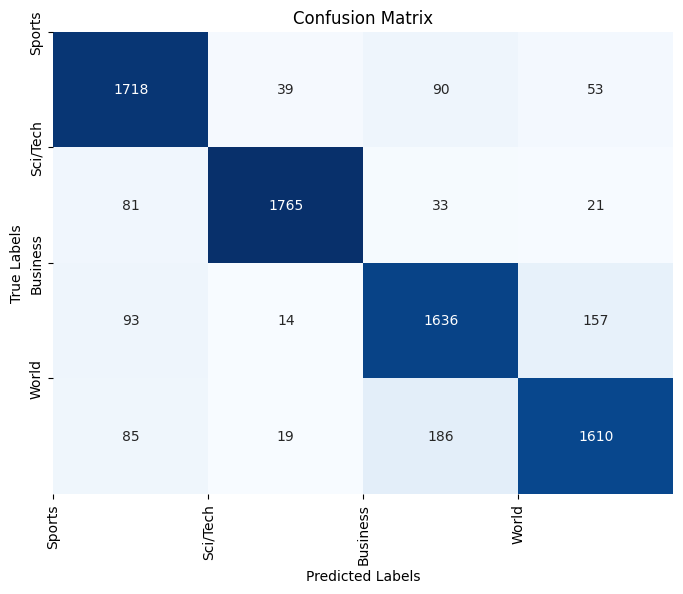

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# create confusion matrix
_, true_labels, predicted_labels = accuracy(rnn_model, test_loader)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Get the text labels for display
text_true_labels = [labels[label] for label in true_labels]
text_predicted_labels = [labels[label] for label in predicted_labels]

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Determine the number of unique labels
num_labels = len(set(text_true_labels + text_predicted_labels))

# Set ticks and labels based on the number of unique labels
plt.xticks(ticks=range(num_labels), labels=list(set(text_predicted_labels)), rotation=90)
plt.yticks(ticks=range(num_labels), labels=list(set(text_true_labels)))

plt.title("Confusion Matrix")
plt.show()



